In [1]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report

In [2]:
#load data
df1=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/alternative.csv",keep_default_na=False,na_values=['?'])
df2=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/blues.csv",keep_default_na=False,na_values=['?'])
df3=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/childrens music.csv",keep_default_na=False,na_values=['?'])
df4=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/comedy.csv",keep_default_na=False,na_values=['?'])
df5=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/electronic.csv",keep_default_na=False,na_values=['?'])
df6=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/folk.csv",keep_default_na=False,na_values=['?'])
df7=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/hip-hop.csv",keep_default_na=False,na_values=['?'])
df8=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/movie.csv",keep_default_na=False,na_values=['?'])
df9=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/ska.csv",keep_default_na=False,na_values=['?'])
df10=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/training-data/soul.csv",keep_default_na=False,na_values=['?'])


In [3]:
#merge to one dataset
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df.shape

(50000, 19)

In [4]:
#Data exploration
#1 - check proportion for each class,make sure all datasets are included in the final set
df['genre'].value_counts()/len(df)

Alternative         0.1
Blues               0.1
Children's Music    0.1
Comedy              0.1
Electronic          0.1
Folk                0.1
Hip-Hop             0.1
Movie               0.1
Ska                 0.1
Soul                0.1
Name: genre, dtype: float64

In [5]:
#2 check duplicates
if any(df.duplicated()):
    print("Hold on! There are duplications in the dataset")

In [6]:
#3 look at datatype of each feature
df.dtypes

instance_id           int64
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
genre                object
dtype: object

In [7]:
#4 Stats of numerical features
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.0000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,42539.000000,50000.000000
mean,126285.9000,37.680800,0.350953,0.572506,1.817114e+05,0.618753,0.093378,0.256996,-8.736643,0.172855,118.850775,0.485764
std,79504.4176,18.205972,0.342806,0.159419,1.456144e+05,0.242324,0.231847,0.238818,4.396351,0.258632,30.644647,0.247137
min,43000.0000,0.000000,0.000001,0.061700,-1.000000e+00,0.000216,0.000000,0.012400,-38.445000,0.022200,32.244000,0.000000
25%,62500.7500,25.000000,0.024900,0.467000,1.078498e+05,0.445000,0.000000,0.101000,-11.040000,0.037400,94.678000,0.289000
50%,102540.5000,41.000000,0.219000,0.576000,1.953085e+05,0.641000,0.000033,0.144000,-7.820000,0.057600,116.983000,0.477000
75%,170499.2500,51.000000,0.699000,0.685000,2.469362e+05,0.825000,0.010600,0.326000,-5.562000,0.153000,139.927000,0.676000
max,313859.0000,96.000000,0.996000,0.989000,4.830606e+06,0.999000,0.993000,1.000000,3.744000,0.965000,221.578000,1.000000


In [8]:
#5 vaiarance of numerical features
df.var(numeric_only=True)

instance_id         6.320952e+09
popularity          3.314574e+02
acousticness        1.175160e-01
danceability        2.541439e-02
duration_ms         2.120356e+10
energy              5.872102e-02
instrumentalness    5.375312e-02
liveness            5.703419e-02
loudness            1.932790e+01
speechiness         6.689063e-02
tempo               9.390944e+02
valence             6.107646e-02
dtype: float64

In [9]:
#data visualisation, drop the features that we don't want to check
df_trimed=df.drop(["instance_id","artist_name","track_name","track_id"], axis = 1)
key_encoder=LabelEncoder()
df_trimed["key"]=key_encoder.fit_transform(df_trimed["key"])
mode_encoder=LabelEncoder()
df_trimed["mode"]=mode_encoder.fit_transform(df_trimed["mode"])
ts_encoder=LabelEncoder()
df_trimed["time_signature"]=ts_encoder.fit_transform(df_trimed["time_signature"])
genre_encoder=LabelEncoder()
df_trimed["genre"]=genre_encoder.fit_transform(df_trimed["genre"])
df_trimed.dtypes

popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
genre                 int64
dtype: object

In [10]:
df_trimed.cov()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
popularity,331.457421,-2.326665,0.373486,1.460728e+05,0.665603,-0.287776,0.188655,-1.058183,25.580960,0.915557,-1.198971,35.214879,1.037703,-0.413924,-3.435509
acousticness,-2.326665,0.117516,-0.005785,-1.913536e+03,-0.049963,0.000288,0.022149,0.020405,-0.922825,-0.013851,0.033267,-2.433304,-0.030239,-0.012717,0.026495
danceability,0.373486,-0.005785,0.025414,-8.545871e+02,-0.001181,-0.002646,-0.002911,-0.004577,0.056559,0.005097,0.002143,-0.552757,0.007605,0.014419,0.026495
duration_ms,146072.750572,-1913.535979,-854.587093,2.120356e+10,764.206792,1937.058700,-54.513707,733.074187,4834.971828,1575.288405,816.278634,-78234.383133,97.829776,-2848.579657,-17353.838187
energy,0.665603,-0.049963,-0.001181,7.642068e+02,0.058721,-0.004639,-0.011010,0.010904,0.791900,0.006588,0.006318,1.210428,0.012212,0.012138,-0.080990
instrumentalness,-0.287776,0.000288,-0.002646,1.937059e+03,-0.004639,0.053753,0.009106,-0.006135,-0.169242,0.003651,-0.010095,0.103185,0.001374,-0.007465,-0.014905
key,0.188655,0.022149,-0.002911,-5.451371e+01,-0.011010,0.009106,11.960008,0.006652,-0.145377,-0.075360,0.004493,-1.117933,0.001363,-0.006019,-0.053071
liveness,-1.058183,0.020405,-0.004577,7.330742e+02,0.010904,-0.006135,0.006652,0.057034,-0.093329,-0.002167,0.039421,-1.025951,-0.014013,-0.003912,-0.076114
loudness,25.580960,-0.922825,0.056559,4.834972e+03,0.791900,-0.169242,-0.145377,-0.093329,19.327903,0.118678,-0.229775,24.821935,0.283783,0.177643,-0.574384
mode,0.915557,-0.013851,0.005097,1.575288e+03,0.006588,0.003651,-0.075360,-0.002167,0.118678,0.221193,0.001423,-0.125686,0.005789,-0.004606,0.020550


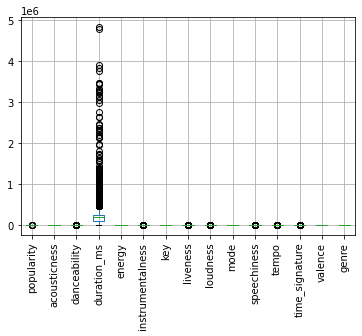

In [11]:
boxplot = df_trimed.boxplot(rot=90)  

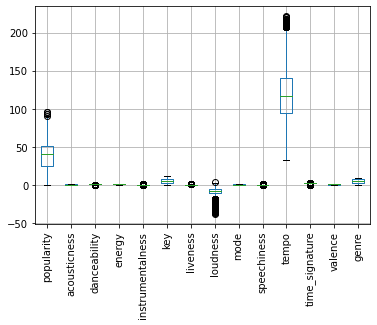

In [12]:
df_dm=df_trimed.drop(["duration_ms"],axis=1)
boxplot = df_dm.boxplot(rot=90)  

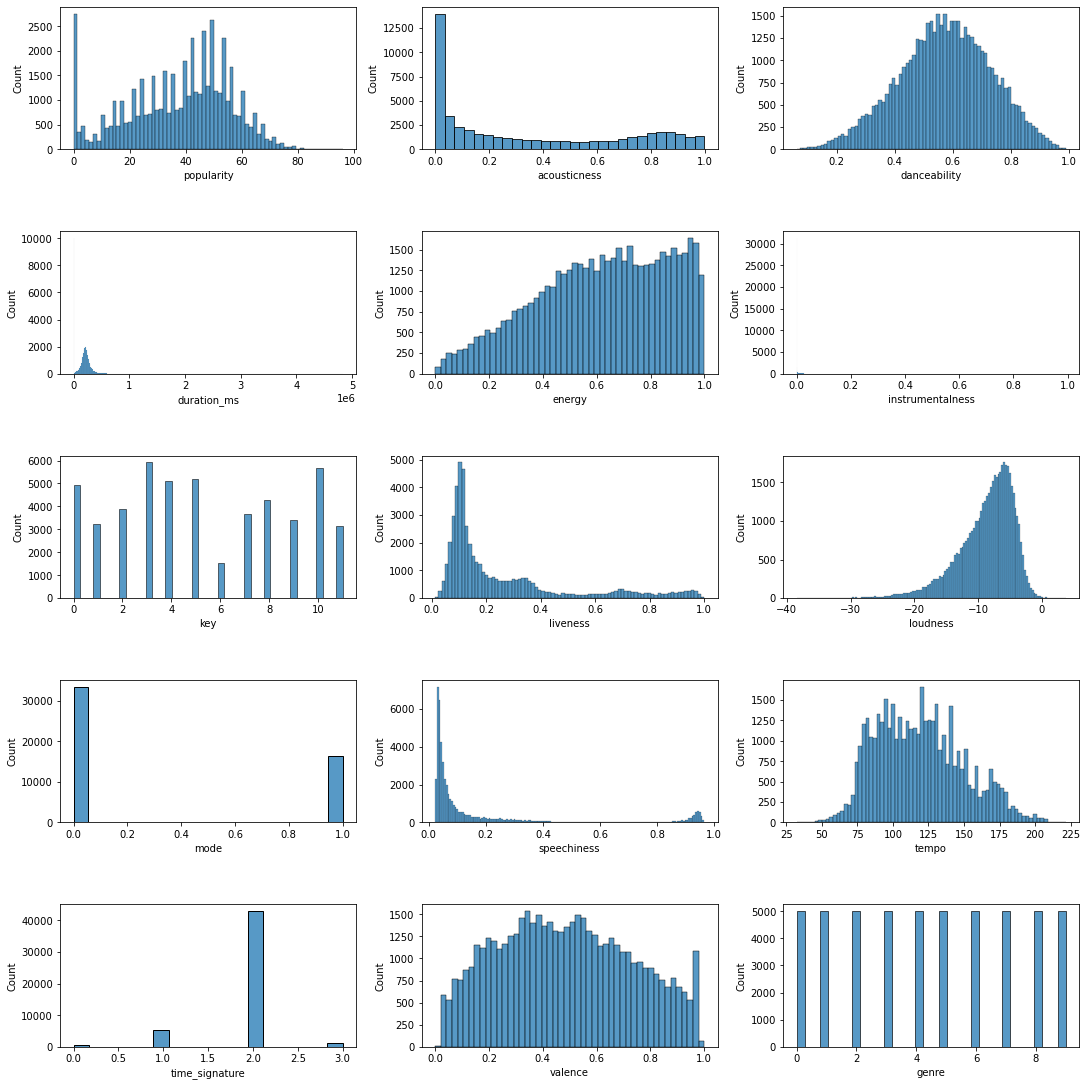

In [13]:
#visualise data distribution
fig, axs = plt.subplots(ncols = 3, nrows = 5, figsize = (15, 15))
#fig.delaxes(axs[4][2])
i = 0

axs = axs.flatten()
for k, v in df_trimed.items():
    sns.histplot(v, ax = axs[i])
    i += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

<AxesSubplot:>

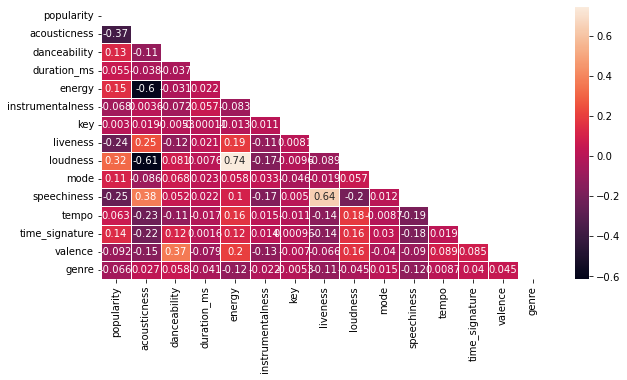

In [14]:
mask = np.zeros_like(df_trimed.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df_trimed.corr(), annot=True,mask=mask,linewidth=.5)

<AxesSubplot:>

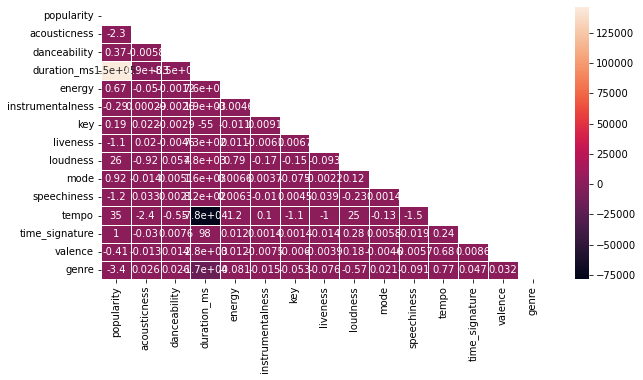

In [15]:
mask = np.zeros_like(df_trimed.cov())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df_trimed.cov(), annot=True,mask=mask,linewidth=.5)

In [16]:
#preprocess the data
#1) split the dataset to a training set(90%) and avalidation set(10%)
x=df.drop("genre", axis = 1)
y=df["genre"]
train_x,val_x,train_y,val_y=train_test_split(x, y, test_size=0.1, random_state=309)

In [17]:
#2) drop irrelavant features and encode categorical features
train_x_clean=train_x.drop(["instance_id","artist_name","track_name","track_id"], axis = 1)
key_encoder=LabelEncoder()
train_x_clean["key"]=key_encoder.fit_transform(train_x_clean["key"])
mode_encoder=LabelEncoder()
train_x_clean["mode"]=mode_encoder.fit_transform(train_x_clean["mode"])
ts_encoder=LabelEncoder()
train_x_clean["time_signature"]=ts_encoder.fit_transform(train_x_clean["time_signature"])

#3) encode target variable
genre_encoder=LabelEncoder()
train_y_encoded=genre_encoder.fit_transform(train_y)

train_x_clean.dtypes


popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [18]:
#4) impute missing values
# duration_ms
from sklearn.impute import KNNImputer
#dms_imputer = KNNImputer(n_neighbors=2, weights="uniform")
#train_x_clean["duration_ms"] = dms_imputer.fit_transform(train_x_clean[["duration_ms"]])
# tempo
tempo_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_x_clean["tempo"] = tempo_imputer.fit_transform(train_x_clean[["tempo"]])

print("The number of missing values ")
print(train_x_clean.isnull().sum())

The number of missing values 
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


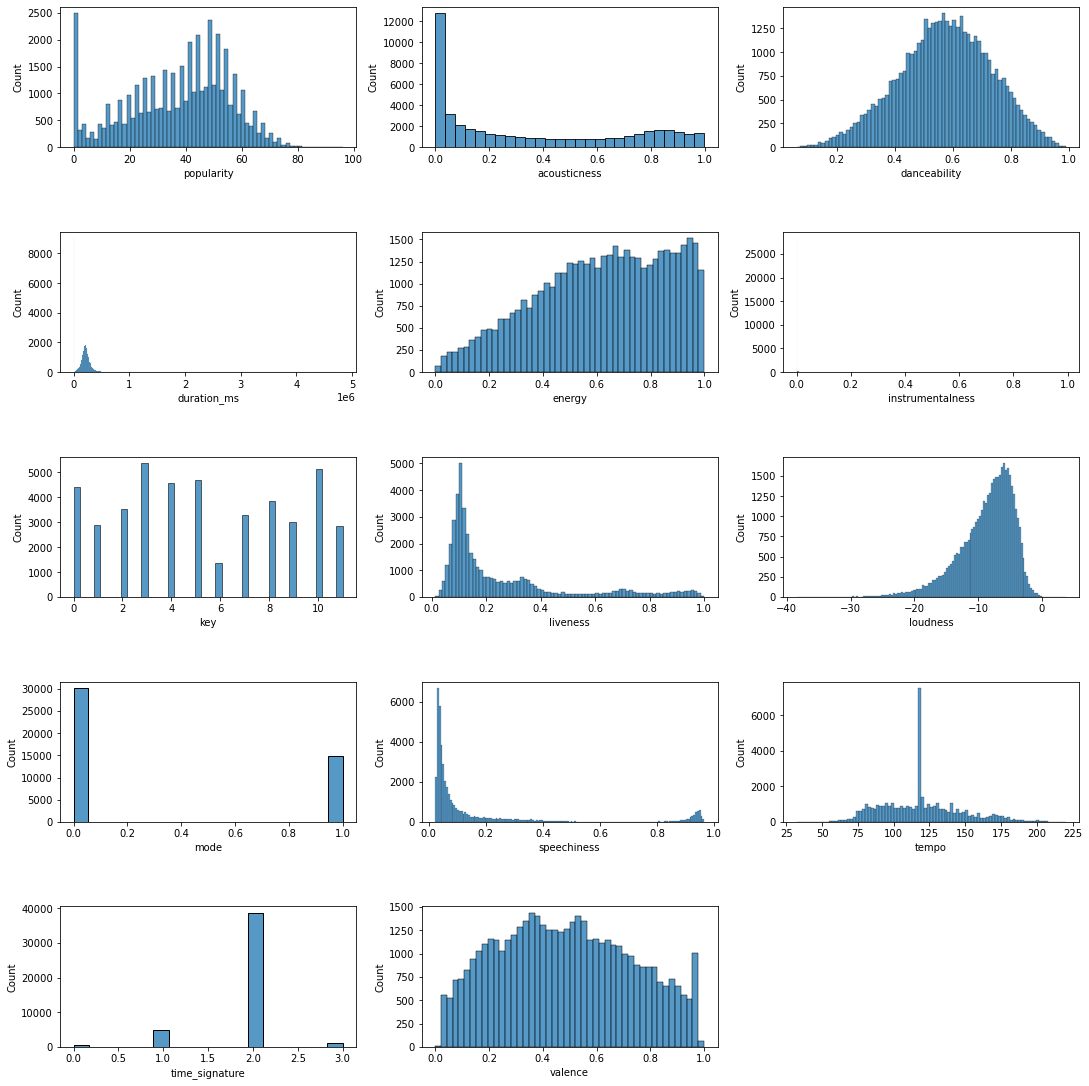

In [19]:
#visualise data distribution
fig, axs = plt.subplots(ncols = 3, nrows = 5, figsize = (15, 15))
fig.delaxes(axs[4][2])
i = 0

axs = axs.flatten()
for k, v in train_x_clean.items():
    sns.histplot(v, ax = axs[i])
    i += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [20]:
#6) Scale the data
#improvement1 - use scaler to [0,1] instead of standardscaler
#scaler=StandardScaler()
#x_scaled=scaler.fit_transform(train_x_clean_fs)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_x_clean)
print(x_scaled)

[[0.28125    0.04066142 0.48668176 ... 0.46088642 0.66666667 0.685     ]
 [0.5        0.01264933 0.84255365 ... 0.46465345 0.66666667 0.172     ]
 [0.375      0.79016037 0.81451526 ... 0.50872423 0.66666667 0.566     ]
 ...
 [0.38541667 0.70381488 0.47481937 ... 0.36790209 0.66666667 0.841     ]
 [0.52083333 0.07218756 0.76490888 ... 0.46088642 0.66666667 0.28      ]
 [0.52083333 0.17469773 0.19982746 ... 0.46088642 0.66666667 0.273     ]]


In [21]:
#5) perform feature selection
#train_x_clean_fs=train_x_clean.drop(["loudness","liveness"], axis = 1)
from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2, k=12)
train_x_final = selector.fit_transform(x_scaled, train_y_encoded)

In [23]:
#7) Transform the validation set
#val_x_clean=val_x.drop(["instance_id","artist_name","track_name","track_id","loudness","liveness"], axis = 1)
val_x_clean=val_x.drop(["instance_id","artist_name","track_name","track_id"], axis = 1)
val_x_clean["key"]=key_encoder.transform(val_x_clean["key"])
val_x_clean["mode"]=mode_encoder.transform(val_x_clean["mode"])
val_x_clean["time_signature"]=ts_encoder.transform(val_x_clean["time_signature"])
val_y_encoded=genre_encoder.transform(val_y)
val_x_clean["tempo"] = tempo_imputer.transform(val_x_clean[["tempo"]])
#val_x_scaled=scaler.fit_transform(val_x_clean)
val_x_scaled=min_max_scaler.fit_transform(val_x_clean)
val_x_final=selector.transform(val_x_scaled)


In [24]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(train_x_final, train_y_encoded)
pred_knn = knnmodel.predict(val_x_final)
acc_knn=accuracy_score(val_y_encoded,pred_knn)
print(acc_knn)

0.5312


In [25]:
#random forest
rfmodel = RandomForestClassifier(max_depth=13)
rfmodel.fit(train_x_final, train_y_encoded)
pred_rf = rfmodel.predict(val_x_final)
acc_rf=accuracy_score(val_y_encoded,pred_rf)
print(acc_rf)

0.6122


In [26]:
#LR
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(max_iter=400)
lrmodel.fit(train_x_final, train_y_encoded)
pred_lr = lrmodel.predict(val_x_final)
acc_lr=accuracy_score(val_y_encoded,pred_lr)
print(acc_lr)

0.5508


In [27]:
#further evaluation
print(classification_report(val_y_encoded,pred_rf))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38       507
           1       0.56      0.49      0.52       507
           2       0.44      0.23      0.30       452
           3       0.99      0.94      0.96       504
           4       0.69      0.64      0.67       473
           5       0.47      0.62      0.54       493
           6       0.65      0.88      0.75       542
           7       0.76      0.80      0.78       524
           8       0.74      0.66      0.70       493
           9       0.41      0.40      0.40       505

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.60      5000
weighted avg       0.61      0.61      0.60      5000



In [29]:
# Load and transform the test set
df_test=pd.read_csv("/Users/Jessie/Documents/JupyterNotebook/ass3data/test-data/test.csv",keep_default_na=False,na_values=['?'])
#test_x=df_test.drop(["instance_id","artist_name","track_name","track_id","loudness","liveness"], axis = 1)
test_x=df_test.drop(["instance_id","artist_name","track_name","track_id"], axis = 1)
test_x["key"]=key_encoder.transform(df_test["key"])
test_x["mode"]=mode_encoder.transform(df_test["mode"])
test_x["time_signature"]=ts_encoder.transform(df_test["time_signature"])
test_x["tempo"] = tempo_imputer.transform(df_test[["tempo"]])
#test_x_final=scaler.fit_transform(test_x)
test_x_final=min_max_scaler.transform(test_x)
test_x_final=selector.transform(test_x_final)

print(test_x_final[:10])

[[4.40860215e-01 2.56023058e-01 6.92491579e-01 9.51831458e-01
  2.58064516e-01 8.58166923e-02 8.47879699e-01 1.00000000e+00
  3.89231751e-01 5.93477465e-01 1.00000000e+00 3.65365365e-01]
 [4.08602151e-01 3.65460962e-01 6.38161469e-01 2.96538589e-01
  7.82258065e-06 1.20327701e-01 6.89112782e-01 0.00000000e+00
  1.08533731e-02 2.48115808e-01 1.00000000e+00 6.00600601e-01]
 [5.91397849e-01 4.46786377e-01 4.29533848e-01 4.25991544e-01
  0.00000000e+00 5.82693292e-02 6.55699248e-01 1.00000000e+00
  2.33879549e-01 8.91761235e-01 1.00000000e+00 4.98498498e-01]
 [7.52688172e-02 3.33332403e-01 7.54427904e-01 5.44405876e-01
  0.00000000e+00 3.26164875e-01 8.06766917e-01 0.00000000e+00
  5.00106406e-03 2.86171106e-01 1.00000000e+00 8.39839840e-01]
 [5.80645161e-01 5.83946598e-04 5.79484951e-01 8.96638338e-01
  1.25000000e-06 3.18996416e-01 8.47729323e-01 0.00000000e+00
  9.68291126e-03 3.56193070e-01 1.00000000e+00 6.43643644e-01]
 [3.11827957e-01 1.81587603e-03 3.93675975e-01 9.78926263e-01
  1

In [30]:
#apply the trained model to test data
y_pred=rfmodel.predict(test_x_final)
y_pred=genre_encoder.inverse_transform(y_pred)
print(y_pred[:10])

['Electronic' 'Soul' 'Hip-Hop' 'Movie' "Children's Music" 'Ska'
 'Alternative' 'Movie' "Children's Music" 'Ska']


In [31]:
#save prediction to csv - ready to upload to kaggle
instance_id=df_test["instance_id"]
prediction=pd.DataFrame(instance_id)
prediction["genre"]=y_pred
prediction.to_csv("ass3data/preds.csv", index=False)
prediction.head

<bound method NDFrame.head of        instance_id             genre
0                1        Electronic
1                2              Soul
2                3           Hip-Hop
3                4             Movie
4                5  Children's Music
...            ...               ...
30926        30927             Movie
30927        30928       Alternative
30928        30929              Folk
30929        30930              Folk
30930        30931  Children's Music

[30931 rows x 2 columns]>